<a href="https://colab.research.google.com/github/waltermayor/DigitalSignalProce_colab/blob/master/clase_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurar Driver con google **colab**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Clonar repositorio desde github al **drive**

In [4]:
%cd /content/drive/My Drive
!pwd
!git clone https://github.com/waltermayor/DigitalSignalProce_colab.git

/content/drive/My Drive
/content/drive/My Drive
fatal: destination path 'DigitalSignalProce_colab' already exists and is not an empty directory.


# Configurar la ruta hasta el **repositorio**

In [5]:
% cd /content/drive/My Drive/DigitalSignalProce_colab/libraries
!pwd

/content/drive/My Drive/DigitalSignalProce_colab/libraries
/content/drive/My Drive/DigitalSignalProce_colab/libraries


In [6]:
!pwd
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot

import numpy as np
import pandas as pd

np.set_printoptions(precision=3, suppress=True)

/content/drive/My Drive/DigitalSignalProce_colab/libraries


# Señ**ales**  (signals)

In [0]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)

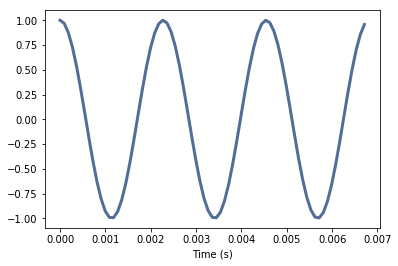

In [8]:
cos_sig.plot()
thinkplot.config(xlabel='Time (s)')

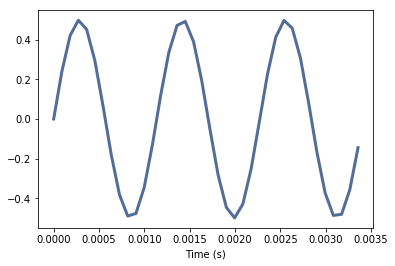

In [9]:
sin_sig.plot()
thinkplot.config(xlabel='Time (s)')

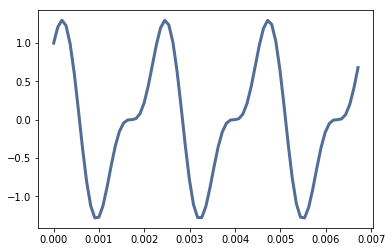

In [12]:
mix = sin_sig + cos_sig
mix.plot()

# **Ondas** (Waves)

**construir una onda apartir de una señal**

In [48]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
#wave = mix.make_wave(duration=2, start=0.5, framerate=9960)
wave 

**Crear un audio apartir de la onda**

In [24]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

**Otra forma de crear el audio**

In [39]:
wave.make_audio()

**`Numero de muestras (ys) y cantidad de cuadros por ms `**

In [27]:
print('Number of samples', len(wave.ys))
print('Timestep in ms', 1 / wave.framerate * 1000)

Number of samples 5512
Timestep in ms 0.09070294784580499


**Periodo señales periodicas y segmento de la onda**

In [33]:
period = mix.period
segment = wave.segment(start=0, duration=period*3)
period

0.0022727272727272726

**dibujar onda (wave)**

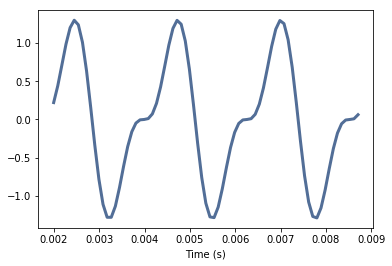

In [34]:
segment.plot()
thinkplot.config(xlabel='Time (s)')

Normalizar. escala la onda para que los valores no excendan el rango entre -1 y 1

In [50]:
wave.normalize()
wave.make_audio()

Apodize. Suaviza las discontinuidades en el inicio y final de la onda grabada. 

Apodization. permite evitar las oscilaciones (Ringin) producidas ante cambios repentinos de la entrada

[Ringing](https://en.wikipedia.org/wiki/Ringing_(signal))

In [52]:
wave.apodize()
wave.make_audio()

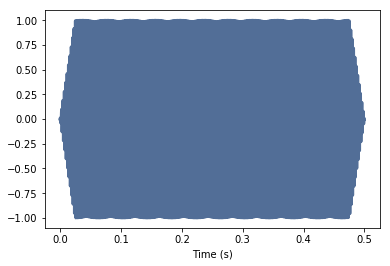

In [53]:
wave.plot()
thinkplot.config(xlabel='Time (s)')